# Nutrition, Physical Activity, and Obesity
The referente for source data is: [source data](https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system) 

[Data Dictionary](https://chronicdata.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7)

This dataset includes data on adult's diet, physical activity, and weight status.

This dataset includes data on adult's diet, physical activity, and weight status from Behavioral Risk Factor Surveillance System. This data is used for DNPAO's Data, Trends, and Maps database, which provides national and state specific data on obesity, nutrition, physical activity, and breastfeeding.


# 1 - Load the data and first analysis about the variables

In [1]:
# Load packages: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.neighbors import NearestNeighbors

In [2]:
# Geral configs:
plt.style.use('bmh')

In [3]:
# Load original data
data = pd.read_csv('data/Nutrition__Physical_Activity__and_Obesity.csv')

In [4]:
data.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075


In [5]:
# Verify all columns name and the shape of data:
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [6]:
data.shape

(88629, 33)

Verify the values null about all columns:

In [7]:
na_values = pd.DataFrame(data.isna().sum(), columns=['Total Values null'])
na_values['%_weight'] = na_values['Total Values null'].apply(lambda x: x/data.shape[0]*100)
na_values

,Total Values null,%_weight
YearStart,0,0.000000
YearEnd,0,0.000000
LocationAbbr,0,0.000000
LocationDesc,0,0.000000
Datasource,0,0.000000
Class,0,0.000000
Topic,0,0.000000
Question,0,0.000000
Data_Value_Unit,88629,100.000000
Data_Value_Type,0,0.000000


Here we can drop the variable that contain more than 50% loss values, because this is not be representative. The variables with contain others null values will be treated.

List the columns to be drop:

In [8]:
drop_na_columns = na_values.loc[na_values['%_weight'] > 50]
drop_na_columns

,Total Values null,%_weight
Data_Value_Unit,88629,100.000000
Data_Value_Footnote_Symbol,79851,90.095793
Data_Value_Footnote,79851,90.095793
Total,85464,96.428934
Age(years),69639,78.573605
Education,75969,85.715736
Gender,82299,92.857868
Income,66474,75.002539
Race/Ethnicity,63309,71.431473


In [9]:
drop_na_columns.index.values

array(['Data_Value_Unit', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Total', 'Age(years)', 'Education',
       'Gender', 'Income', 'Race/Ethnicity'], dtype=object)

In [10]:
data1 = data.drop(drop_na_columns.index.values, axis=1)
data1.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,30.6,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.3,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD


In [11]:
# Verify duplicated values : 
data1.duplicated().sum()

0

The new dataframe was created in data1 for preserve the integrity about the original data in "data". The all values with contain null more than 50% was removed, and put a reforce check in data.info() and verify if this new dataframe was some type about duplicate data. 

In [12]:
# Check the values in columns YearsStart and YearsEnd is equal in all observed registers: 
(data1.YearStart != data1.YearEnd).sum()

0

How we can observe above, the columns that represent Yearstart and YearEnd have the same values, and we can union in just one column, like "Year_ref".

In [13]:
# Transform the columns YearStart and YearEnd into one "Year_ref"
data1.drop('YearEnd', axis=1, inplace=True)

In [14]:
data1.rename(columns={'YearStart': 'Year_ref'}, inplace=True)

In [15]:
data1.head(5)

,Year_ref,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,30.6,30.6,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.3,29.3,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,28.8,28.8,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.7,32.7,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,Value,26.6,26.6,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [16]:
# About dataset info: 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88629 entries, 0 to 88628
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_ref                   88629 non-null  int64  
 1   LocationAbbr               88629 non-null  object 
 2   LocationDesc               88629 non-null  object 
 3   Datasource                 88629 non-null  object 
 4   Class                      88629 non-null  object 
 5   Topic                      88629 non-null  object 
 6   Question                   88629 non-null  object 
 7   Data_Value_Type            88629 non-null  object 
 8   Data_Value                 79851 non-null  float64
 9   Data_Value_Alt             79851 non-null  float64
 10  Low_Confidence_Limit       79851 non-null  float64
 11  High_Confidence_Limit      79851 non-null  float64
 12  Sample_Size                79851 non-null  float64
 13  GeoLocation                86977 non-null  obj

In [17]:
data1.describe()

,Year_ref,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,88629.000000,79851.000000,79851.000000,79851.000000,79851.000000,79851.000000,88629.000000
mean,2016.011362,31.236493,31.236493,26.907732,36.135953,3656.809044,30.906475
std,3.121080,10.113829,10.113829,9.907896,11.061591,18706.392637,17.485456
min,2011.000000,0.900000,0.900000,0.300000,3.000000,50.000000,1.000000
25%,2013.000000,24.300000,24.300000,20.000000,28.600000,516.000000,17.000000
50%,2016.000000,31.200000,31.200000,26.800000,35.900000,1109.000000,30.000000
75%,2019.000000,37.000000,37.000000,32.900000,42.200000,2408.000000,45.000000
max,2021.000000,77.600000,77.600000,70.200000,87.700000,476876.000000,78.000000


# 2. Formulation Questions and Hypotheses

Check a sample about two first line for look in all variable and yours results:


In [18]:
data1.sample(4).T

,34555,57252,43492,32632
Year_ref,2015,2012,2019,2017
LocationAbbr,DE,IA,MI,MS
LocationDesc,Delaware,Iowa,Michigan,Mississippi
Datasource,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System
Class,Physical Activity,Obesity / Weight Status,Physical Activity,Obesity / Weight Status
Topic,Physical Activity - Behavior,Obesity / Weight Status,Physical Activity - Behavior,Obesity / Weight Status
Question,Percent of adults who achieve at least 150 min...,Percent of adults aged 18 years and older who ...,Percent of adults who achieve at least 300 min...,Percent of adults aged 18 years and older who ...
Data_Value_Type,Value,Value,Value,Value
Data_Value,28.1,29.6,34.9,31.0
Data_Value_Alt,28.1,29.6,34.9,31.0


In [19]:
(data.Data_Value == data.Data_Value_Alt).unique()

array([ True, False])

In [20]:
data.LocationAbbr.unique()

array(['US', 'GU', 'WY', 'DC', 'PR', 'AL', 'RI', 'DE', 'NJ', 'WA', 'ME',
       'MI', 'VA', 'CA', 'UT', 'NY', 'MA', 'AR', 'IL', 'NH', 'NM', 'MD',
       'MN', 'HI', 'LA', 'SD', 'TX', 'KY', 'WV', 'CO', 'OK', 'MS', 'OR',
       'WI', 'KS', 'FL', 'ID', 'AZ', 'VI', 'MT', 'GA', 'NC', 'PA', 'ND',
       'SC', 'NE', 'TN', 'MO', 'NV', 'IA', 'IN', 'OH', 'AK', 'VT', 'CT'],
      dtype=object)

In [21]:
data.Class.unique()

array(['Physical Activity', 'Obesity / Weight Status',
       'Fruits and Vegetables'], dtype=object)

In [22]:
data.Topic.unique()

array(['Physical Activity - Behavior', 'Obesity / Weight Status',
       'Fruits and Vegetables - Behavior'], dtype=object)

In [23]:
data.QuestionID.unique()

array(['Q047', 'Q036', 'Q037', 'Q045', 'Q044', 'Q043', 'Q046', 'Q018',
       'Q019'], dtype=object)

In [24]:
data1.DataValueTypeID.unique()

array(['VALUE'], dtype=object)

In [25]:
data1.Question.unique()


array(['Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a we

In [26]:
data1.Class.isin(data1.Topic).unique()

array([False,  True])

In [27]:
data1.Datasource.unique()

array(['Behavioral Risk Factor Surveillance System'], dtype=object)

**Some observations**: 

    * Column Datasource doesn't is representative for this analysis, because this represent the source about data and have just one: Behavioral Risk Factor Surveillance System. (Will be dropped)
    * Column DataValueTypeID have just one VALUE. Doesn't is representative. (Will be dropped) 

# 2.1  What are the questions and yours code link?

In [28]:
data1.QuestionID.nunique()

9

In [29]:
questions_code = data1[['Question', 'QuestionID']].drop_duplicates().reset_index(drop=True)
questions_code

,Question,QuestionID
0,Percent of adults who engage in no leisure-tim...,Q047
1,Percent of adults aged 18 years and older who ...,Q036
2,Percent of adults aged 18 years and older who ...,Q037
3,Percent of adults who achieve at least 300 min...,Q045
4,Percent of adults who achieve at least 150 min...,Q044
5,Percent of adults who achieve at least 150 min...,Q043
6,Percent of adults who engage in muscle-strengt...,Q046
7,Percent of adults who report consuming fruit l...,Q018
8,Percent of adults who report consuming vegetab...,Q019


Print all question for visualization: 

In [30]:
for i in questions_code.Question.values:
    print(i+'\n')

Percent of adults who engage in no leisure-time physical activity

Percent of adults aged 18 years and older who have obesity

Percent of adults aged 18 years and older who have an overweight classification

Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)

Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week

Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)

Percent of adults who engage in muscle-strengthening activities on 2 or more days a week

Percent of adults who report consuming fruit less than one

In [31]:
# Function to return the Question by Question ID: 
def question(ID: str) -> str:
    return questions_code.loc[questions_code.QuestionID == ID].Question.values[0]

# 2.1.1 What are the most frequently question? 

In [32]:
quest_freq = data1['QuestionID'].value_counts()
quest_freq

Q036    16577
Q037    16577
Q047    16549
Q045     7449
Q044     7449
Q043     7449
Q046     7449
Q018     4565
Q019     4565
Name: QuestionID, dtype: int64

Text(0.5, 1.0, 'Frequency about questionsID')

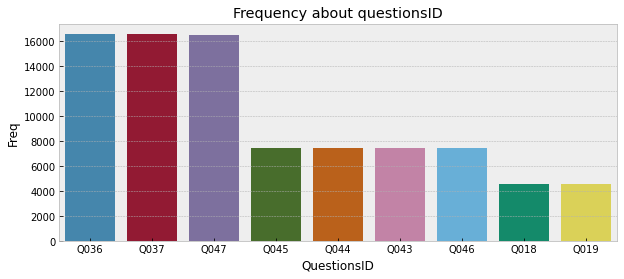

In [33]:
#plot
plt.figure(figsize=(10,4))
sns.barplot(x=quest_freq.index, y = quest_freq.values)
plt.xlabel('QuestionsID')
plt.ylabel('Freq')
plt.title('Frequency about questionsID')

* The most questions frequencies are _Q036_, _Q037_ and Q047.

    `Q036` - *'Percent of adults aged 18 years and older who have obesity'*.
    
    `Q037` - *'Percent of adults aged 18 years and older who have an overweight classification'*.
    
    `Q047` - *'Percent of adults who engage in no leisure-time physical activity'*.
    
* The less frequencies are: 

    `Q018` - *'Percent of adults who report consuming vegetables less than one time daily'*
    
    `Q019` - *'Percent of adults who report consuming fruit less than one time daily'*

    

In [34]:
question('Q036')

'Percent of adults aged 18 years and older who have obesity'

# 2.1.2 What are the distributions about Data_Values for this QuestionIDs

Text(0.5, 1.0, 'QuestionID: Q019')

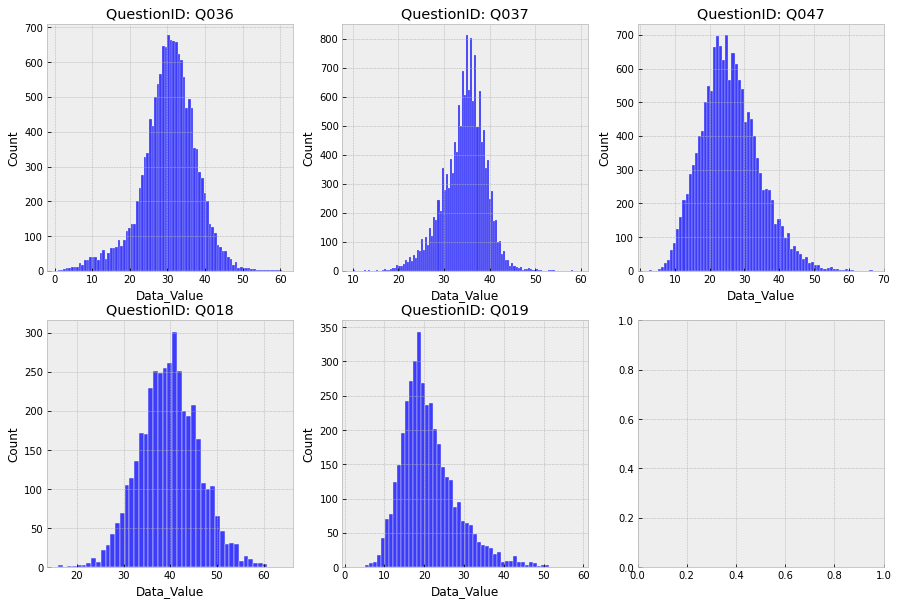

In [35]:
f, axe = plt.subplots(2,3, figsize=(15, 10))
sns.histplot(data1.loc[data1.QuestionID == 'Q036'],
             x='Data_Value', ax=axe[0,0])
axe[0,0].set_title('QuestionID: Q036')
sns.histplot(data1.loc[data1.QuestionID == 'Q037'],
             x='Data_Value', ax=axe[0,1])
axe[0,1].set_title('QuestionID: Q037')
sns.histplot(data1.loc[data1.QuestionID == 'Q047'],
             x='Data_Value', ax=axe[0,2])
axe[0,2].set_title('QuestionID: Q047')
sns.histplot(data1.loc[data1.QuestionID == 'Q018'],
             x='Data_Value', ax=axe[1,0])
axe[1,0].set_title('QuestionID: Q018')
sns.histplot(data1.loc[data1.QuestionID == 'Q019'],
             x='Data_Value', ax=axe[1,1])
axe[1,1].set_title('QuestionID: Q019')

**Observations**

Probably all the values about questions follow the normal distribution. For confirm this hypothese, we'll apply the Shapiro-Wilk test.

    H0: the distribuition are normal.
    
For columns with contain na value yet, we fill this for respective mean value.

In [36]:
def test_Data_value_normal(ID:str):
    values = (
            data1.loc[data1.QuestionID == ID].
            Data_Value.
            fillna(data1.loc[data1.QuestionID == ID].
            Data_Value.mean()).
            values
         )
    statistic, p_value = stats.shapiro(np.random.choice(values, size=5000))
    print('Statistic:', statistic)
    print('p-value:', p_value) 

In [37]:
main_questions = ['Q036', 'Q037', 'Q046', 'Q018', 'Q019']
for test in main_questions:
    print('Test for:', test)
    test_Data_value_normal(test)
    print('\n')

Test for: Q036
Statistic: 0.9664239883422852
p-value: 1.2840433195338577e-32


Test for: Q037
Statistic: 0.9719464182853699
p-value: 3.171002276032435e-30


Test for: Q046
Statistic: 0.9850428104400635
p-value: 1.3210017332051186e-22


Test for: Q018
Statistic: 0.991569459438324
p-value: 1.1140260702094303e-16


Test for: Q019
Statistic: 0.9327815175056458
p-value: 9.234556879900544e-43




Therefore, how to show above, we fail to reject H0. Probably all distributions is a normal. 

Verify the outilers:

In [38]:
# Function for plot and visualize outliers
def plot_outlier(ID: str):
    # get data with the ID reference: 
    df = pd.DataFrame(
        (
            data1.loc[data1.QuestionID ==ID].
            Data_Value.
            fillna(data1.loc[data1.QuestionID ==ID].Data_Value.mean()).
            values
        ), columns=['Value'])

    # get summary statistics of the data
    summary = df.describe()

    # calculate the interquartile range (IQR)
    Q1 = summary.loc['25%','Value']
    Q3 = summary.loc['75%','Value']
    IQR = Q3 - Q1

    # identify outlier values
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers2 = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

    # Plot the outlier values
    fig, ax = plt.subplots()
    ax.scatter(x= range(len(df)), y=df.Value)
    ax.scatter(x= outliers2.index.values, y=df.iloc[outliers2.index.values,:].Value.values)
    ax.set_title(ID)
    ax.set_ylabel('Value')
    ax.set_xlabel('index')
    plt.show()

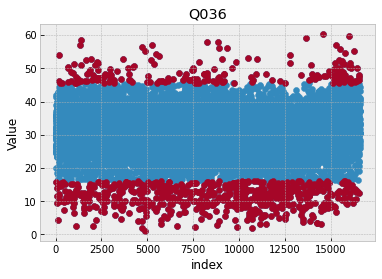

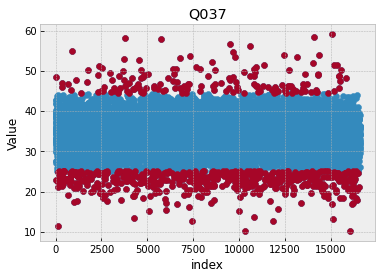

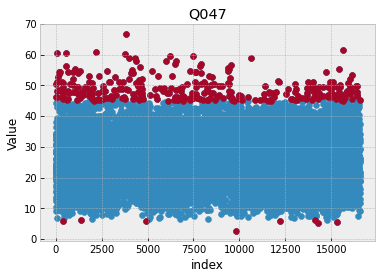

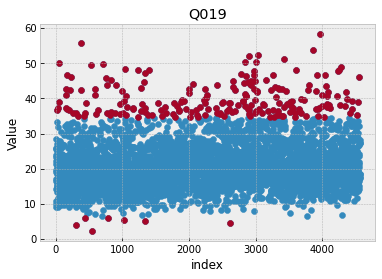

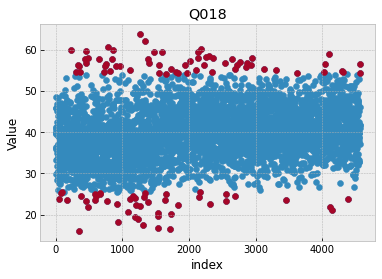

In [39]:
# Plot all outilers for the variables: 
plot_outlier('Q036')
plot_outlier('Q037')
plot_outlier('Q047')
plot_outlier('Q019')
plot_outlier('Q018')

# 2.2 - What are the top 10 higher percent of adults aged 18 years and older who have obesity and what is your location by year reference?

- QuestionID = Q036

In [40]:
question('Q036')

'Percent of adults aged 18 years and older who have obesity'

In [41]:
subset_Q036 = data1.loc[data1.QuestionID=='Q036'].copy()
top_10_obesity = subset_Q036.sort_values('Data_Value', ascending=False).reset_index(drop=True).head(10)

In [42]:
top_10_obesity_byYear = top_10_obesity[['Year_ref', 'LocationAbbr','LocationDesc','Data_Value']].sort_values('Year_ref').reset_index(drop=True)

In [43]:
top_10_obesity[['Year_ref','LocationAbbr', 'LocationDesc', 'Data_Value','Sample_Size']]

,Year_ref,LocationAbbr,LocationDesc,Data_Value,Sample_Size
0,2016,OH,Ohio,60.4,94.0
1,2021,VI,Virgin Islands,59.7,238.0
2,2011,NV,Nevada,59.2,55.0
3,2018,NC,North Carolina,58.6,82.0
4,2019,AZ,Arizona,58.0,555.0
5,2019,ND,North Dakota,57.8,181.0
6,2018,IN,Indiana,57.0,54.0
7,2014,WI,Wisconsin,56.9,96.0
8,2021,VI,Virgin Islands,56.9,101.0
9,2015,UT,Utah,56.5,50.0


**Observation:**
    
    - Note that the higher values for percent obesity  was 60.4 in 2016 at Ohio. 

In [44]:
top_10_obesity_byYear = top_10_obesity_byYear.groupby(by=['Year_ref','LocationAbbr']).agg({'Data_Value':'mean'}).reset_index()
top_10_obesity_byYear

,Year_ref,LocationAbbr,Data_Value
0,2011,NV,59.2
1,2014,WI,56.9
2,2015,UT,56.5
3,2016,OH,60.4
4,2018,IN,57.0
5,2018,NC,58.6
6,2019,AZ,58.0
7,2019,ND,57.8
8,2021,VI,58.3


In [45]:
top_10_obesity_byYear.describe()

,Year_ref,Data_Value
count,9.000000,9.000000
mean,2016.777778,58.077778
std,3.073181,1.229612
min,2011.000000,56.500000
25%,2015.000000,57.000000
50%,2018.000000,58.000000
75%,2019.000000,58.600000
max,2021.000000,60.400000


In [46]:
top_10_obesity_byYear.LocationAbbr.values

array(['NV', 'WI', 'UT', 'OH', 'IN', 'NC', 'AZ', 'ND', 'VI'], dtype=object)

# 2.3 What are the percent obesity evolution by year and state? 

- QuestionID = Q036;

- For put a answer for this topic, we will create a function for link the preference select state

In [47]:
# Function for groupby by year by state and QuestionID
def select_state_evolution(stateID: list, ID: str):
    """
    Selects and groups state-level data from a pandas DataFrame based on a list of state IDs and a specific question ID.

    Args:
    - stateID (list): A list of state abbreviations to select data from. Must match the values in the 'LocationAbbr' column of the input DataFrame.
    - ID (str): A string representing the question ID to select data for. Must match the values in the 'QuestionID' column of the input DataFrame.

    Returns:
    - A pandas DataFrame with columns 'Year_ref', 'LocationAbbr', and 'Data_Value'. Rows are grouped by 'Year_ref' and 'LocationAbbr', and the mean 'Data_Value' for each group is calculated and displayed.

    Example:
    >>> select_state_evolution(['CA', 'TX'], 'Q123')
    Year_ref LocationAbbr Data_Value
    2018     CA           30.2
             TX           25.6
    2019     CA           35.6
             TX           28.1
    """
    subset = data1.loc[(data1.LocationAbbr.isin(stateID)) & (data1.QuestionID==ID)]
    return subset.groupby(by=['Year_ref','LocationAbbr']).agg({'Data_Value':'mean'}).reset_index()

In [48]:
states = top_10_obesity_byYear.LocationAbbr.values
df = select_state_evolution(states, 'Q036')

Plot the summary for the top 10 higher percentage obesity about state:

Text(0.5, 1.0, 'Mean Values evolution obesity per year about the top 10 higher states')

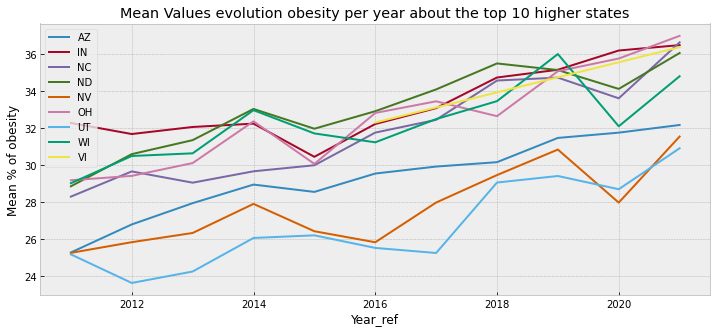

In [49]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='Year_ref', y='Data_Value', hue='LocationAbbr')
plt.legend()
plt.ylabel('Mean % of obesity')
plt.title('Mean Values evolution obesity per year about the top 10 higher states')

**Observations:**
    
    - All states are in uptrend
    - About the data, by 2020 all states increase yours rates of obesity

# 2.4 What is the correlation between the % of adults with obesity and the % of adults who do not exercise with the reference on the top 10 higher rate states with obesity?
- QuestionID = Q036
- QuestionID = Q047

In [50]:
question('Q036')

'Percent of adults aged 18 years and older who have obesity'

In [51]:
question('Q047')

'Percent of adults who engage in no leisure-time physical activity'

Text(0.5, 0, '% obesity')

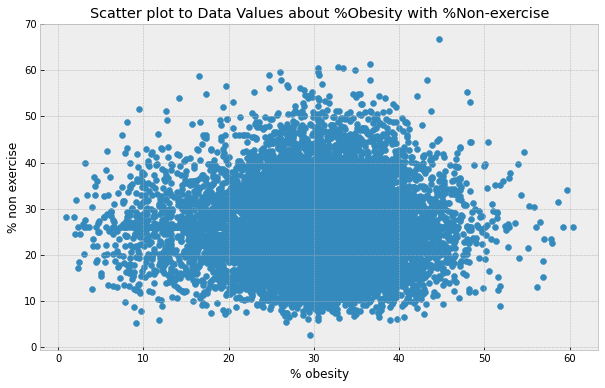

In [52]:
# Plot scatterplot for Data_Value to each class question
Q036_val = (data1.query('QuestionID == "Q036"').
            Data_Value.fillna(data1.query('QuestionID =="Q036"').Data_Value.mean()).
            reset_index(drop=True).
            sample(16000)
           )

Q047_val = (data1.query('QuestionID == "Q047"').
            Data_Value.fillna(data1.query('QuestionID =="Q047"').Data_Value.mean()).
            reset_index(drop=True).
            sample(16000)
           )
plt.figure(figsize=(10,6))
plt.scatter(Q036_val, Q047_val)
plt.title('Scatter plot to Data Values about %Obesity with %Non-exercise')
plt.ylabel('% non exercise')
plt.xlabel('% obesity')

In [53]:
# Pearson Correlation: 
cor_Q036_Q047 = Q036_val.corr(Q047_val)
print(cor_Q036_Q047)

-0.00427315128228732


### 2.5 What are the 10 regions that have the highest rates of non-exercise practitioners?

In [54]:
subset_Q047 = (
    data1.loc[data1.QuestionID=='Q047']
    [['Year_ref', 'LocationAbbr', 'LocationDesc', 'Data_Value', 'Sample_Size']].
    reset_index(drop=True)
)
subset_Q047.head(2)

,Year_ref,LocationAbbr,LocationDesc,Data_Value,Sample_Size
0,2020,US,National,30.6,31255.0
1,2015,PR,Puerto Rico,38.1,421.0


In [55]:
df_non_exercise = (
    subset_Q047.groupby(['LocationAbbr']).
    agg({'Data_Value':'mean'}).
    sort_values('Data_Value', ascending=False).
    reset_index().head(10)
)
df_non_exercise

,LocationAbbr,Data_Value
0,PR,44.234524
1,MS,33.316800
2,AR,31.651986
3,KY,30.976812
4,LA,30.928881
5,OK,30.494346
6,AL,30.399273
7,TN,30.384444
8,WV,29.986100
9,GU,28.909500


Plot the summary about above table: 

Text(0.5, 1.0, 'Top 10 higher rate about non-exercise')

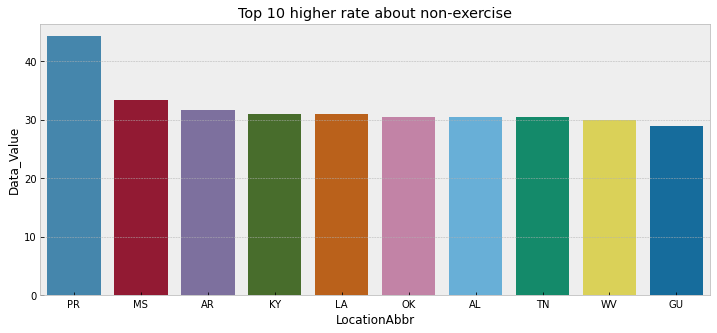

In [56]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_non_exercise, x='LocationAbbr', y='Data_Value')
plt.title('Top 10 higher rate about non-exercise')

### 2.6 About years rate evolution obesity  Puerto Rico.

In [57]:
df_year_PR = select_state_evolution(['PR'], 'Q036')
df_year_PR

,Year_ref,LocationAbbr,Data_Value
0,2013,PR,27.576190
1,2014,PR,27.438095
2,2015,PR,29.361905
3,2016,PR,30.176190
4,2017,PR,31.314286
5,2018,PR,32.880952
6,2019,PR,31.947619
7,2020,PR,31.338095
8,2021,PR,35.352381


Text(0.5, 1.0, 'Evolution rate obesity at Puerto Rico')

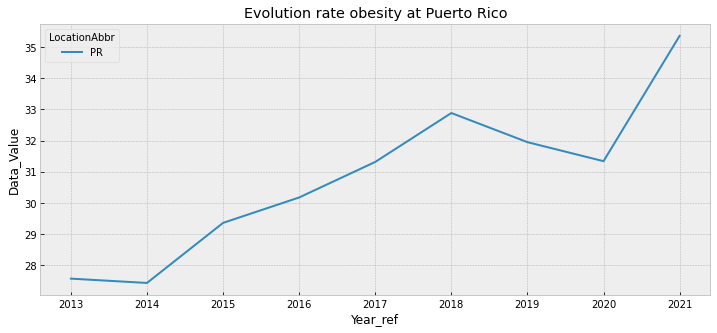

In [58]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df_year_PR, x='Year_ref', y='Data_Value', hue='LocationAbbr')
plt.title('Evolution rate obesity at Puerto Rico')

Note that PR have the higher rate about no leisure-time physical, but this is not the higher rate about obesity. 

In [59]:
df_year_PR.Data_Value.max()

35.352380952380955

### 2.7 What are the rate by year of % obesity? 

In [60]:
sub_data_rate = select_state_evolution(['PR'], 'Q036')
sub_data_rate

,Year_ref,LocationAbbr,Data_Value
0,2013,PR,27.576190
1,2014,PR,27.438095
2,2015,PR,29.361905
3,2016,PR,30.176190
4,2017,PR,31.314286
5,2018,PR,32.880952
6,2019,PR,31.947619
7,2020,PR,31.338095
8,2021,PR,35.352381


In [61]:
sub_data_rate['Data_Value'].pct_change()

0         NaN
1   -0.005008
2    0.070115
3    0.027733
4    0.037715
5    0.050030
6   -0.028385
7   -0.019079
8    0.128096
Name: Data_Value, dtype: float64

In [62]:
def calculate_change_rate_by_state(stateID: list, questionID:str):
    subdata = select_state_evolution(list(stateID), questionID)
    result = subdata['Data_Value'].pct_change()
    result.index = subdata.Year_ref.values
    return result

In [63]:
# Example rates of Puerto Rico: 
calculate_change_rate_by_state(['PR'],'Q036')

2013         NaN
2014   -0.005008
2015    0.070115
2016    0.027733
2017    0.037715
2018    0.050030
2019   -0.028385
2020   -0.019079
2021    0.128096
Name: Data_Value, dtype: float64

In [64]:
all_stateID = data1.LocationAbbr.unique()
df_rate_obesity_states = pd.DataFrame()
for state in all_stateID: 
    df_rate_obesity_states = pd.concat([df_rate_obesity_states, calculate_change_rate_by_state([state],'Q036')],
                                        axis=1,
                                      )
df_rate_obesity_states.columns = all_stateID

In [65]:
# Summary statistical rates: 
df_rate_obesity_states.describe()

,US,GU,WY,DC,PR,AL,RI,DE,NJ,WA,...,NE,TN,MO,NV,IA,IN,OH,AK,VT,CT
count,10.000000,7.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.021410,0.032079,0.027509,0.011331,0.032652,0.025584,0.022314,0.021367,0.020468,0.014127,...,0.026455,0.020590,0.021843,0.024394,0.028815,0.012819,0.025043,0.021703,0.016550,0.022159
std,0.010918,0.122579,0.047354,0.044611,0.051665,0.040468,0.055341,0.064727,0.058608,0.046734,...,0.027119,0.061059,0.072647,0.065539,0.077794,0.032753,0.048789,0.089909,0.051104,0.050786
min,0.006177,-0.125813,-0.066756,-0.052448,-0.028385,-0.033462,-0.036439,-0.070218,-0.083697,-0.036104,...,-0.009782,-0.081905,-0.063037,-0.092948,-0.078635,-0.055605,-0.071050,-0.147880,-0.065519,-0.051072
25%,0.013080,-0.061998,0.005304,-0.013645,-0.008526,-0.002436,-0.025277,-0.013343,-0.009041,-0.019331,...,0.012163,-0.023268,-0.022804,-0.012077,-0.022865,0.006247,0.010892,0.006237,-0.032275,-0.008131
50%,0.021307,0.024438,0.031929,0.005074,0.032724,0.024073,0.010040,0.010387,0.009354,0.003929,...,0.020036,0.037975,-0.003406,0.034841,0.027942,0.012031,0.021532,0.040293,0.041774,0.020556
75%,0.028378,0.125942,0.056740,0.024555,0.055051,0.047613,0.070299,0.063967,0.052177,0.027296,...,0.041880,0.065026,0.047983,0.058032,0.086664,0.028845,0.064383,0.062638,0.059440,0.055465
max,0.042860,0.198045,0.106873,0.107855,0.128096,0.092482,0.109806,0.145197,0.119315,0.110013,...,0.071401,0.097783,0.177813,0.127626,0.159561,0.058248,0.091548,0.151703,0.065467,0.108570


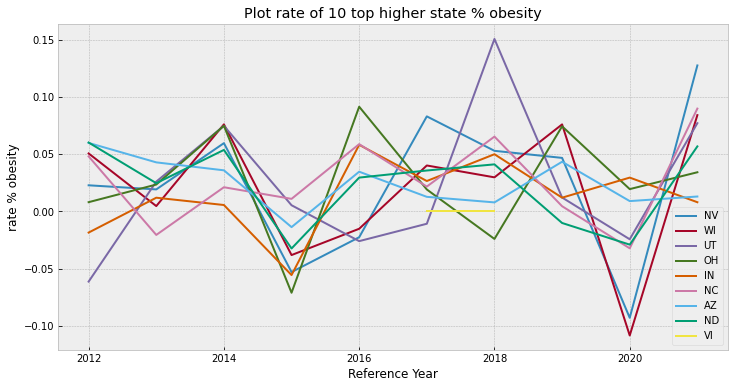

In [66]:
# Plot top 10 higher states % obesity
plt.figure(figsize=(12,6))
plt.plot(df_rate_obesity_states[states], label=states)
plt.title('Plot rate of 10 top higher state % obesity')
plt.ylabel('rate % obesity')
plt.xlabel('Reference Year')
plt.legend()

Text(0, 0.5, 'ID States')

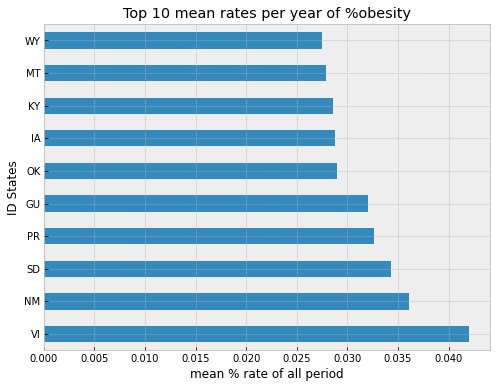

In [67]:
# Top 10 rates: 
plt.figure(figsize=(8,6))
df_rate_obesity_states.describe().loc['mean'].sort_values(ascending=False)[:10].plot.barh()
plt.title('Top 10 mean rates per year of %obesity')
plt.xlabel('mean % rate of all period')
plt.ylabel('ID States')